In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

In [10]:
#Starobinsky potential
V = '3*M**2/4*(1 - exp(-sqrt(2/3)*phi) )**2*(1 +b*exp(-(phi-phi_0)**2/(2*c**2) ) )'
param = {'M' : 1.3e-5, 'b': 4.21e-4, 'phi_0': 5.1, 'c': 0.00999}
potential = PotentialFunction.from_string(V, param_values=param) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 5.7)
sol = background.solver()

In [11]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)

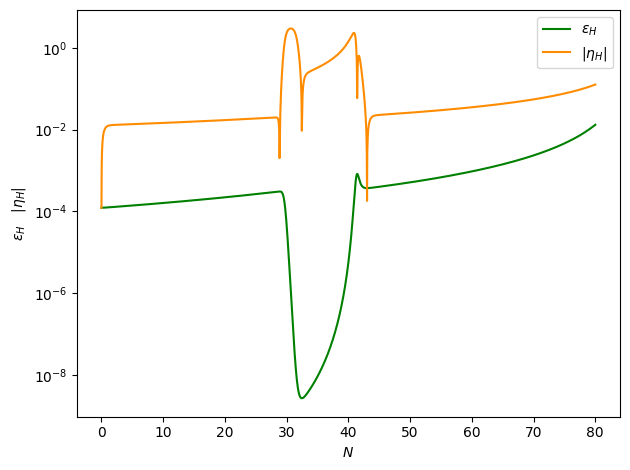

In [12]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()
plt.show()

In [18]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 57)
sol_pivot = pert.Power_spectra_pivot()

Curvature power spectrum at pivot scale is 2.161318213122298e-09
Tensor to scalar ratio at pivot scale is 0.0038347457021080025


In [19]:
PS = pert.Power_spectrum(save = True)

Computing P(k): 100%|██████████| 1000/1000 [01:25<00:00, 11.68it/s]


k_peak = 3.10\times 10^{+01} Mpc^-1
N_peak = 19.66511426661419
P_s(k_peak) = 0.00040517145924635645
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

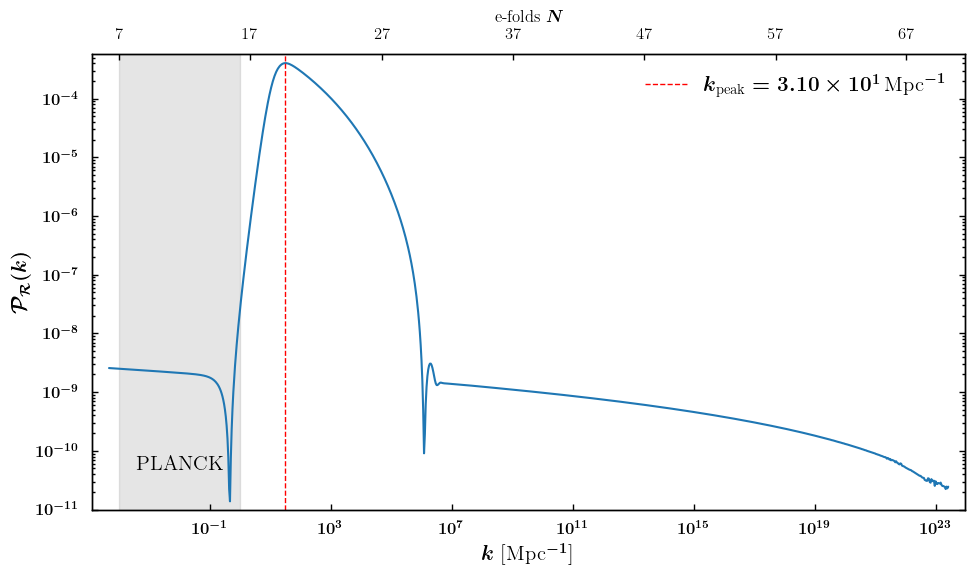

In [12]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)

In [14]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 0.0
MPBH_peak = 1.2020941713135035e+21 M⊙
